In [1]:
import pandas as pd

In [2]:
import descartes
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline


In [3]:
from missing_columns_pd import miss_cols

In [4]:
NY_pop_per_zip_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\NY_pop_per_zip_df.csv', dtype={'Zip_Code':str}, index_col=0)

In [6]:
NY_pop_per_zip_df.head()

,Zip_Code,population_per_zip
0,06390,61.0
1,10001,25026.0
2,10002,74363.0
3,10003,54671.0
4,10004,3310.0


In [7]:
# !pip install mapclassify

read in us shape file

In [8]:

us = gpd.read_file(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\tl_2020_us_zcta520.shp')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [9]:
pd.set_option('display.max_columns', None)
us.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [10]:
us.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33791 entries, 0 to 33790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA5CE20   33791 non-null  object  
 1   GEOID20     33791 non-null  object  
 2   CLASSFP20   33791 non-null  object  
 3   MTFCC20     33791 non-null  object  
 4   FUNCSTAT20  33791 non-null  object  
 5   ALAND20     33791 non-null  int64   
 6   AWATER20    33791 non-null  int64   
 7   INTPTLAT20  33791 non-null  object  
 8   INTPTLON20  33791 non-null  object  
 9   geometry    33791 non-null  geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.6+ MB


In [11]:
type(us)

geopandas.geodataframe.GeoDataFrame

merge US census shape file with pop_per_zip_df

Note:  to create a geodataframe, the geodataframe must be on the left of the merge

In [12]:
NY_pop_gdf = us.merge(NY_pop_per_zip_df,how='inner',left_on='ZCTA5CE20', right_on='Zip_Code')

In [14]:
NY_pop_gdf.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Zip_Code,population_per_zip
0,12473,12473,B5,G6350,S,22753586,74981,+42.2606746,-074.0313109,"POLYGON ((-74.06661 42.28101, -74.06541 42.282...",12473,573.0
1,12477,12477,B5,G6350,S,172754173,1397511,+42.0925906,-073.9881105,"MULTIPOLYGON (((-74.07646 42.05371, -74.07020 ...",12477,17870.0
2,12481,12481,B5,G6350,S,33053825,12960366,+41.9766948,-074.2279622,"POLYGON ((-74.27831 41.99362, -74.27808 41.994...",12481,1732.0
3,12487,12487,B5,G6350,S,42306049,739187,+41.8693992,-073.9988053,"POLYGON ((-74.05037 41.85107, -74.05027 41.851...",12487,3370.0
4,12523,12523,B5,G6350,S,57831255,479391,+42.0868702,-073.7595090,"POLYGON ((-73.81415 42.06305, -73.81408 42.063...",12523,1810.0


In [103]:
# ax = polk_gdf.plot(column='population_density',legend = True, figsize=(15, 10),
#                       )
# ax.set_axis_off(); # turns off axis labels

In [15]:
# ax = polk_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
#                       )
# ax.set_axis_off(); # turns off axis labels

In [84]:
# # scott
# scott_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Scott County']

In [16]:
# type(scott_gdf)

In [17]:
# ax = scott_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
#                       )
# ax.set_axis_off(); # turns off axis labels

In [18]:
# Dubuque
# Dubuque = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Dubuque County']

In [19]:
# # Dubuque
# ax = Dubuque.plot(column='Total_population',legend = True, figsize=(15, 10),
#                       )
# ax.set_axis_off(); # turns off axis labels

In [20]:
# iowa_pop_gdf.shape

In [21]:
# iowa_pop_gdf.info()

In [22]:
NY_land_area_census = NY_pop_gdf[['Zip_Code','ZCTA5CE20','ALAND20','population_per_zip']]

In [16]:
# land_area_census.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\land_area_census.csv')

In [24]:
# census_combined2['land_area_sq_miles'] = census_combined2.ALAND20/2589988.110336 

NY_land_area_census['land_area_sq_miles'] = NY_land_area_census.ALAND20/2589988.110336 
NY_land_area_census['pop_density'] = NY_land_area_census.population_per_zip/NY_land_area_census.land_area_sq_miles

C:\Users\dgarb\AppData\Local\Temp/ipykernel_25228/722336451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_land_area_census['land_area_sq_miles'] = NY_land_area_census.ALAND20/2589988.110336
C:\Users\dgarb\AppData\Local\Temp/ipykernel_25228/722336451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_land_area_census['pop_density'] = NY_land_area_census.population_per_zip/NY_land_area_census.land_area_sq_miles


In [25]:

NY_land_area_census.head()

,Zip_Code,ZCTA5CE20,ALAND20,population_per_zip,land_area_sq_miles,pop_density
0,12473,12473,22753586,573.0,8.785209,65.223266
1,12477,12477,172754173,17870.0,66.700759,267.912993
2,12481,12481,33053825,1732.0,12.762153,135.713776
3,12487,12487,42306049,3370.0,16.334457,206.312339
4,12523,12523,57831255,1810.0,22.328772,81.061331


In [29]:
NY_land_area_census[NY_land_area_census.Zip_Code == '11010']

,Zip_Code,ZCTA5CE20,ALAND20,population_per_zip,land_area_sq_miles,pop_density
809,11010,11010,6229230,25318.0,2.405119,10526.71341


In [31]:
NY_land_area_census[NY_land_area_census.Zip_Code == '11204']

,Zip_Code,ZCTA5CE20,ALAND20,population_per_zip,land_area_sq_miles,pop_density
780,11204,11204,4129771,75840.0,1.594513,47563.09691


In [30]:
NY_land_area_census[NY_land_area_census.Zip_Code == '11375']

,Zip_Code,ZCTA5CE20,ALAND20,population_per_zip,land_area_sq_miles,pop_density
706,11375,11375,6269573,72615.0,2.420696,29997.575055


### map of population_per_store_None

In [53]:
type(iowa_pop_gdf['population_per_store_None'][2])

numpy.float64

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


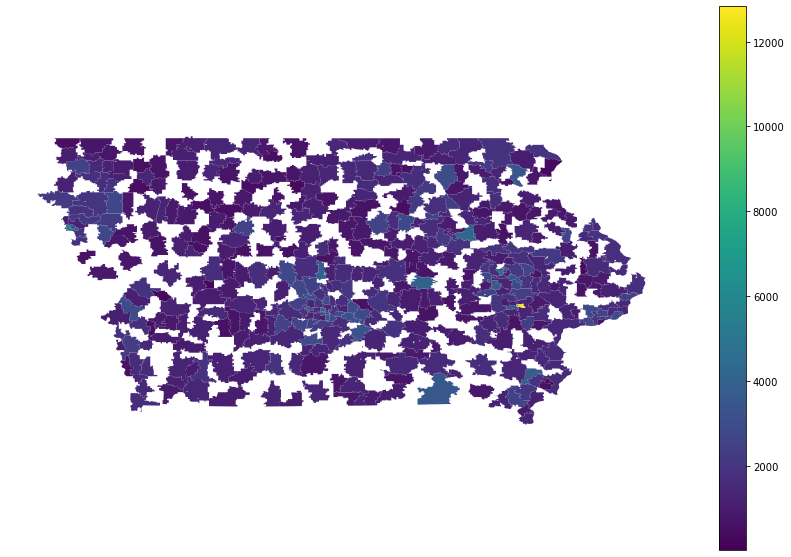

In [54]:


# ax = iowa_pop_gdf.plot(column='population_per_store_None', missing_kwds={'color': 'lightgrey'},legend = True, figsize=(15, 10)) 
                        
ax = iowa_pop_gdf.plot(column='population_per_store_None',legend = True, figsize=(15, 10))                       
ax.set_axis_off(); # turns off axis labels

### map of population_per_store_imputed (impute with the population of the zip code)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


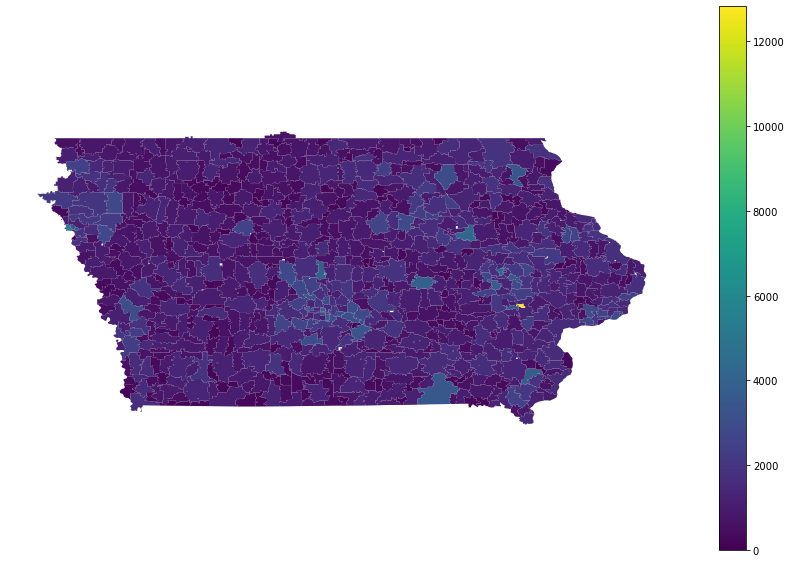

In [67]:
# population_per_store_imputed 
ax = iowa_pop_gdf.plot(column='population_per_store_imputed',legend = True, figsize=(15, 10))                       
ax.set_axis_off(); # turns off axis labels

population 25_to_34_years

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


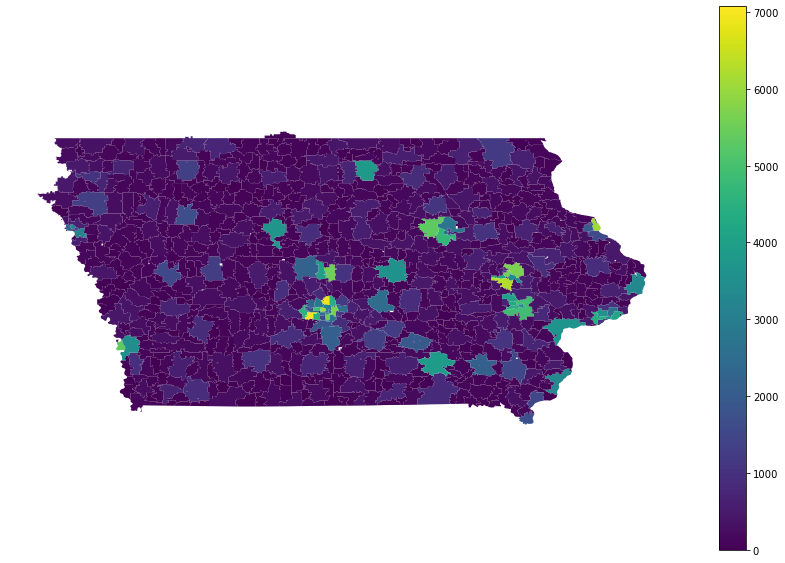

In [62]:

ax = iowa_pop_gdf.plot(column='25_to_34_years',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

Median Income

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


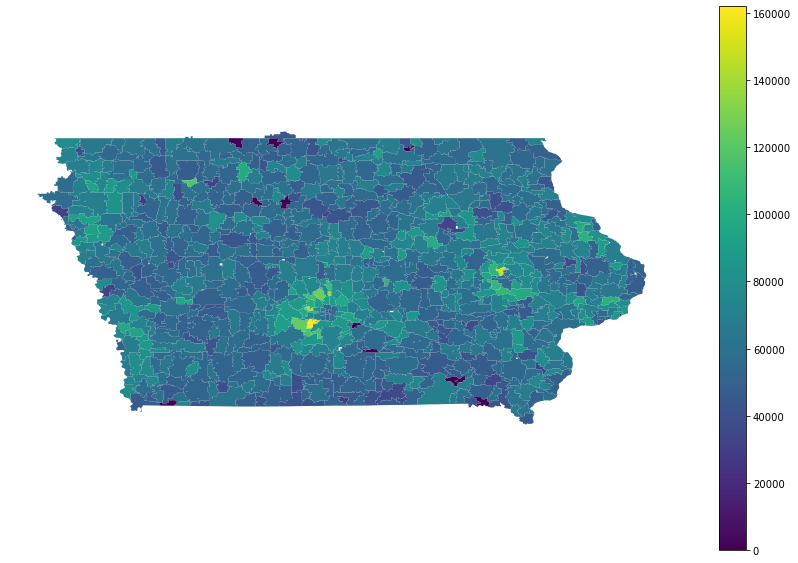

In [42]:


ax = iowa_pop_gdf.plot(column='Median_household_income_(dollars)',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


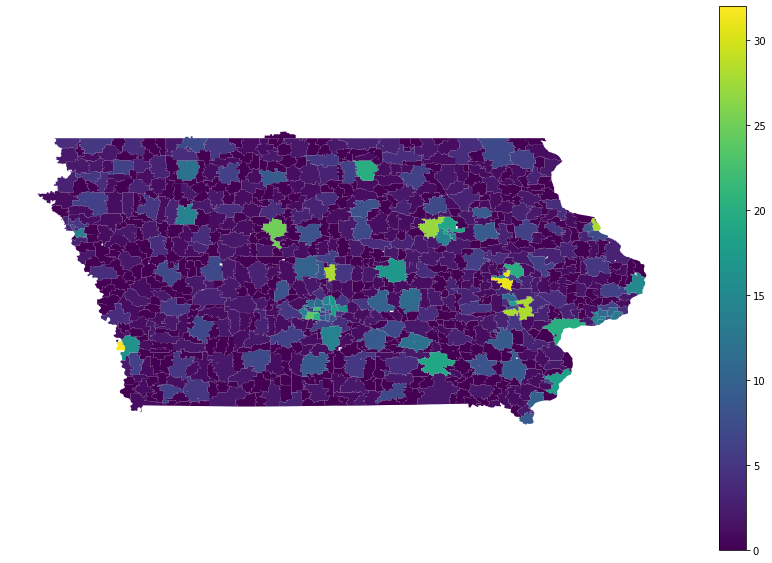

In [50]:
# number_of_stores                   
ax = iowa_pop_gdf.plot(column='number_of_stores',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


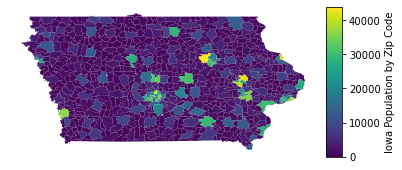

In [20]:
# cmap='RdBu',center=0,annot=True
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

mapit = iowa_pop_gdf.plot(column='population_per_zip', ax=ax, legend = True, cax=cax, figsize=(15, 10),
                      legend_kwds={'label': "Iowa Population by Zip Code",
                         }) #'orientation': "horizontal"
mapit.set_axis_off(); # turns off axis labels

In [21]:
ax = iowa_pop_stores_gdf.plot(column='Store_Number',legend = True, figsize=(15, 10))
ax.set_axis_off(); # turns off axis labels

NameError: name 'iowa_pop_stores_gdf' is not defined

In [ ]:
loc_gdf = gpd.GeoDataFrame(d, crs=iowa_pop_gdf.crs)
type(loc_gdf)
loc_gdf

In [ ]:
loc_gdf.plot(marker='*', markersize=5);
# locations_gpd.to_crs(iowa_pop_gdf)

In [ ]:
# iowa.head(3)
# iowa.info()